# TP Programming with Keras - MNIST problem, autoencoder

We will build an autoencoder neural network on the MNIST database. The objective of an autoencoder is to be able to reduce the data dimension in a non-linear way, into a "latent space". It is a kind of non-linear version of a Principal Component Analysis. The first part is the encoder and proceed to this dimension reduction. The second part of the network, the decoder, recovers the data from the latent space.

In this practice session, some cells must be filled according to the instructions. They are identified by the word **Exercise**. You will perform the **Verifications** yourselves in most cases, by watching if the algorithm correctly works and converges.

Below we import the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf

## Data definition

The following cell loads the MNIST data

In [2]:
#DO NOT CHANGE

(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Exercise**: Apply data normalization (division by 255) and change the output data into categorial vectors (one hot encoding with keras.utils.categorical)

In [3]:
X_train = X_train/255
X_test = X_test/255

**Exercise**: We will use 2D convolutional layer in this autoencoder. Adapt the dimensions of X_train in order to use this type of layer (reminder: you need 3 dimensions).

In [4]:
X_train = np.expand_dims(X_train,axis = 3)
X_test = np.expand_dims(X_test,axis = 3)


## Keras model

### Autoencoder creation

**Exercise**: Create a model named "my_model".

**Specific instructions**:

- Use the format below: this is no longer a sequential format, because a specific option is needed to keep Dropout active during the test phase. You must use the Functional API format.
- Use the following pattern to create your model step by step:

    - inputs = your_layer_1(arguments)(x)

    - x = your_layer_2(arguments)(x)

    - ...

    - outputs = your_final_layer(arguments)(x)

- For the architecture:

    - Start with two or three convolutional layers with MaxPooling, then add a Flatten layer.

    - Then move on to two or three Dense layers.

    - The last Dense layer here will define the latent space. The number of neurons will determine the dimensionality of this latent space. Try using two neurons in the latent space for now. Name it "latent_space" (not x). Use a sigmoid activation function for this layer.

    - Then build the decoder part, which is basically a mirror of the encoder.

    - Recreate the Dense layers symmetrically.

    - The last Dense layer of the decoder must have the same number of neurons as the output of the Flatten layer (you can use model.summary() to check this).

    - Apply a reshape (keras.layers.Reshape()) to restore the shape of the data to what it was before the first Flatten layer.

    - Then apply the mirror of your first convolutional layers, replacing Conv2D with Conv2DTranspose and MaxPooling2D with UpSampling2D (the inverse operation of MaxPooling: it increases the spatial dimensions).

    - The output dimensions must match the input dimensions. This means that the final Conv2DTranspose layer must have only one neuron (one channel). Use a sigmoid activation function in the final layer (since the input data were normalized between 0 and 1).

In [5]:
#TO DO
inputs = keras.layers.Input(shape = X_train.shape[1:])
x = keras.layers.Conv2D(12, kernel_size=(3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(12, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
size_before_flatten = x.shape
x = keras.layers.Flatten()(x)
numneurons_flatten = x.shape[1]
x = keras.layers.Dense(10, activation='relu')(x)
x = keras.layers.Dense(10, activation='relu')(x)
x = keras.layers.Dense(2, activation='sigmoid')(x)
latent_space = x
x = keras.layers.Dense(10, activation='relu')(latent_space)
x = keras.layers.Dense(10, activation='relu')(x)
x = keras.layers.Dense(numneurons_flatten , activation='sigmoid')(x)
x = keras.layers.Reshape(size_before_flatten[1:])(x)
x = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2DTranspose(12, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2DTranspose(12, kernel_size=(3, 3), activation='relu')(x)
outputs = keras.layers.Conv2DTranspose(1, kernel_size=(3, 3), activation='sigmoid')(x)


#DO NOT CHANGE
my_model = keras.models.Model(inputs,outputs) #Full model construction
encoder = keras.models.Model(inputs,latent_space) #Encoder part
decoder = keras.models.Model(latent_space,outputs) #Decoder part

**Exercise**: Display your architecture by calling my_model.summary()

In [6]:
#TO DO
my_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 12)     │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 12)     │         1,308 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         3,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            22 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 5, 5, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 10, 10, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 12, 12, 12)     │         1,308 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 24, 24, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 26, 26, 12)     │         1,308 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │           109 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,735 (41.93 KB)

 Trainable params: 10,735 (41.93 KB)

 Non-trainable params: 0 (0.00 B)

**Verification**: The dimension of the last layer should be (None,28,28,1), the layer in the middle should be named "latent_space" and should contain 2 neurons.

### Model compilation

**Exercise**: Compile your model and choose an optimizer. For an autoencoder, we will compare the output with the input image. We can use a mean squared error loss function, or a binary_crossentropy. It is not necessary to define any metric.

In [7]:
opt = keras.optimizers.Adam(learning_rate=1e-4)
my_model.compile(optimizer=opt, loss='binary_crossentropy')

### Early stopping

**Exercise**: Define an early stopping procedure.

In [8]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

## L'apprentissage

**Exercise**: Run the training as usual. The output data should be X_train here!


In [9]:
my_model.fit(X_train,X_train, epochs = 100, batch_size = 128, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.5816 - val_loss: 0.3752
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3501 - val_loss: 0.3070
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3017 - val_loss: 0.2868
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2831 - val_loss: 0.2683
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2659 - val_loss: 0.2587
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2580 - val_loss: 0.2531
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2523 - val_loss: 0.2494
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2491 - val_loss: 0.2466
Epoch 9/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2465 - val_loss: 0.2444
Epoch 10/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2448 - val_loss: 0.2430
Epoch 11/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2434 - val_loss: 0.2417
Epoch 12/100
375/375 ━━━━━━━━━━━━━━━━━━━

**Verification**: The loss function should decrease and the accuracy should increase. Same thing for the validation loss.

**Exercise**: Plot the evolution of the loss function, and the evolution of the accuracy, for the training set and the validation set.

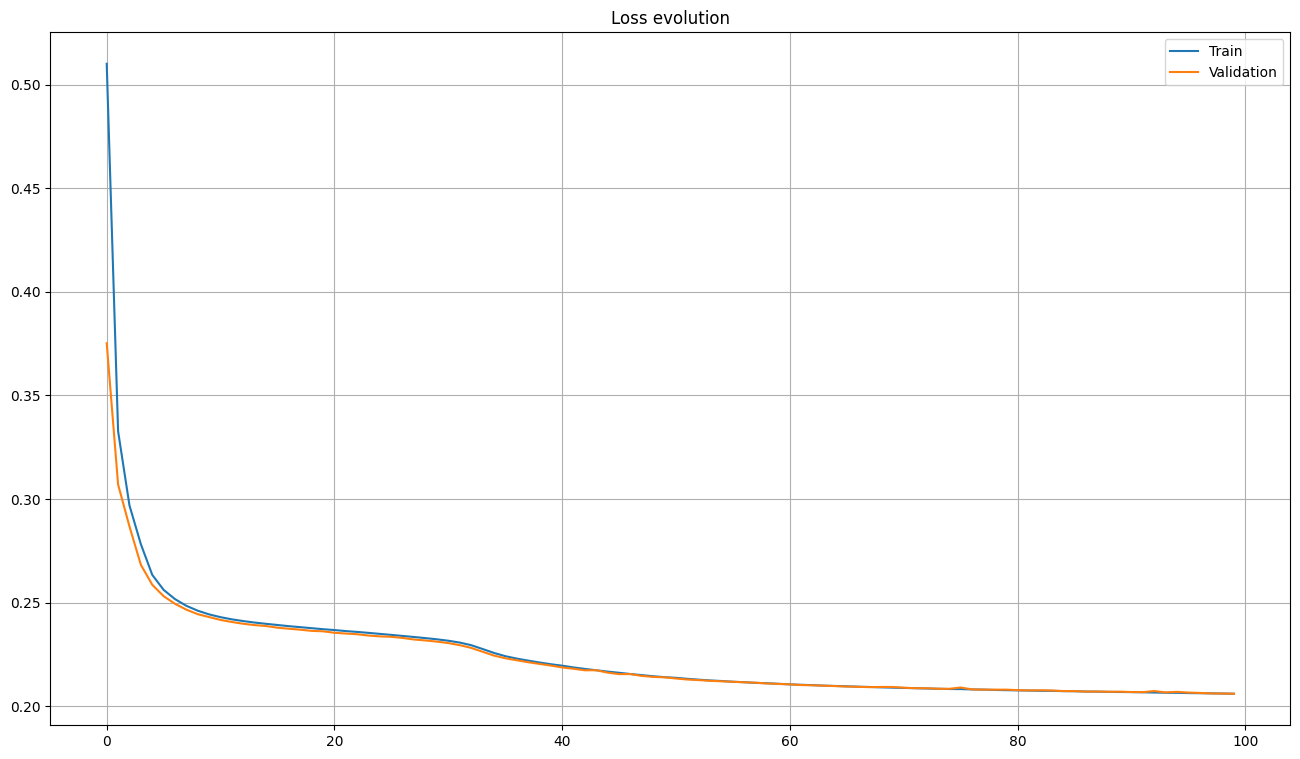

In [15]:
from matplotlib import axes
loss_evolution = my_model.history.history['loss']
val_loss_evolution = my_model.history.history['val_loss']

fig,ax = plt.subplots(1,1,figsize = (16,9))
ax.plot(loss_evolution)
ax.plot(val_loss_evolution)
ax.set_title("Loss evolution")
ax.grid()
ax.legend(["Train","Validation"])
plt.show()


## Predicting with your model

**Exercise**: Run the prediction on the test set. Give it the name X_pred_test.

In [16]:
X_pred_test = my_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


**Exercise**: Display an example of X_test and X_pred_test.

Text(0.5, 1.0, 'Decoded example')

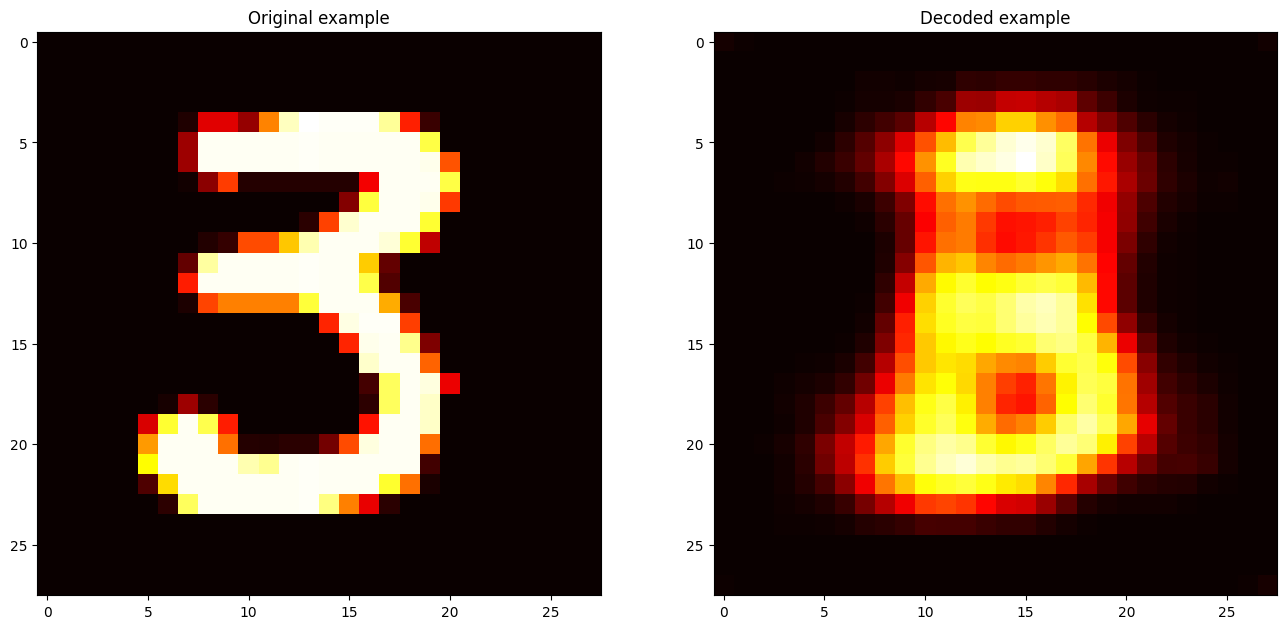

In [25]:
i = np.random.randint(0,X_test.shape[0])

plt.figure(figsize = (16,9))

plt.subplot(121)

plt.imshow(X_test[i,:,:,0])
plt.set_cmap('hot')
plt.title("Original example")

plt.subplot(122)
plt.imshow(X_pred_test[i,:,:,0])
plt.title("Decoded example")

You can see that the data are not perfectly recovered: the dimension of the latent space is not enough to recover all of the dataset, but it should be quiet correct. We will fix this problem later. For the moment, we study the latent space in more details.

## Latent space representation

**Exercise**: Retrieve the outputs of the latent space. To do this, apply the model called encoder.

In [26]:
latent_space_pred = encoder.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Exercise**: We choose 2 dimensions for the latent space in order to easily visualize it. Thanks to plt.scatter, plot the points corresponding to this latent space. Give it a color corresponding to their label, thanks to Y_test (keyword: c = Vector of colors).

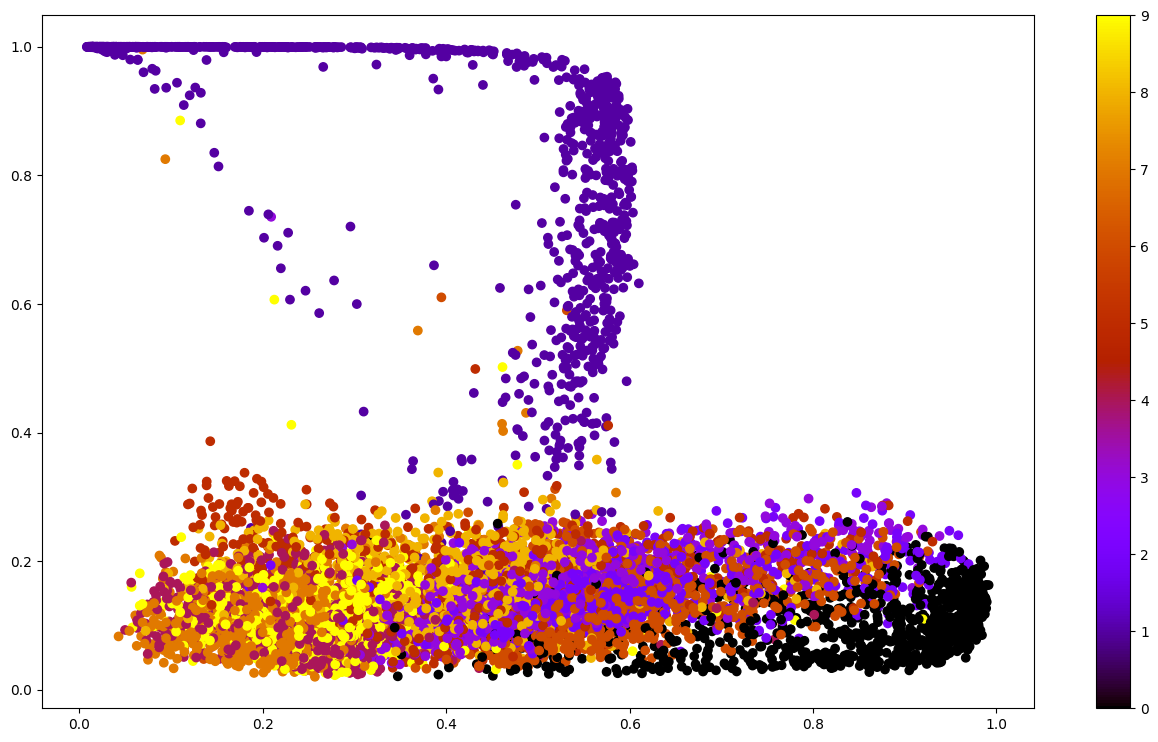

In [33]:
plt.figure(figsize = (16,9))

plt.scatter(latent_space_pred[:,0],latent_space_pred[:,1],c = Y_test, cmap = 'gnuplot')
plt.colorbar()

You should see some clusters, they cannot be well separated, but clearly visible. The 0s and 1s should be quiet well separated from the other classes.

## Better reconstruction

**Exercise**: Take your autoencoder architecture and change the dimension of the latent space. A latent space with 10 dimensions should be enough. Compile and run the training on this new model.

In [5]:
#TO DO
inputs = keras.layers.Input(shape = X_train.shape[1:])
x = keras.layers.Conv2D(12, kernel_size=(3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(12, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
size_before_flatten = x.shape
x = keras.layers.Flatten()(x)
numneurons_flatten = x.shape[1]
x = keras.layers.Dense(10, activation='relu')(x)
x = keras.layers.Dense(10, activation='relu')(x)
x = keras.layers.Dense(2, activation='sigmoid')(x)
latent_space = x
x = keras.layers.Dense(10, activation='relu')(latent_space)
x = keras.layers.Dense(10, activation='relu')(x)
x = keras.layers.Dense(numneurons_flatten , activation='sigmoid')(x)
x = keras.layers.Reshape(size_before_flatten[1:])(x)
x = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2DTranspose(12, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.UpSampling2D(size=(2, 2))(x)
x = keras.layers.Conv2DTranspose(12, kernel_size=(3, 3), activation='relu')(x)
outputs = keras.layers.Conv2DTranspose(1, kernel_size=(3, 3), activation='sigmoid')(x)


#DO NOT CHANGE
new_model = keras.models.Model(inputs,outputs) #Full model construction
new_encoder = keras.models.Model(inputs,latent_space) #Encoder part
new_decoder = keras.models.Model(latent_space,outputs) #Decoder part

In [ ]:
new_opt = keras.optimizers.Adam(learning_rate=1e-4)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
new_model.compile(optimizer=new_opt, loss='binary_crossentropy')
new_model.fit(X_train,X_train, epochs = 100, batch_size =128, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.5792 - val_loss: 0.3596
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3376 - val_loss: 0.3010
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2970 - val_loss: 0.2846
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2835 - val_loss: 0.2769
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2769 - val_loss: 0.2728
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2732 - val_loss: 0.2701
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2708 - val_loss: 0.2683
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2687 - val_loss: 0.2672
Epoch 9/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2679 - val_loss: 0.2662
Epoch 10/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2669 - val_loss: 0.2655
Epoch 11/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2665 - val_loss: 0.2651
Epoch 12/100
375/375 ━━━━━━━━━━━━━━━━━━

**Exercise**: Plot the losses.

**Exercise**: Run the prediction on the test set.

In [ ]:
X_pred_test = #TO DO

**Exercise**: Pick some decoded examples and compare them to the original images.

In [ ]:
#TO DO

### Image denoising

**Exercise**: We apply your autoencoder for image denoising. Select a test image. Add a gaussian noise (with np.random.randn()), indicate the dimension of the noise to apply. Use a standard deviation of 0.1 to start. Apply a function np.clip on this noisy image so that its intensity is between 0 and 1. Finally, apply your auto-encoder to this image. Then you can play by changing the standard deviation for instance.

In [ ]:
i = 6

image = X_test[i:(i+1)]

image_noisy = #TO DO (apply a gaussian noise and apply a clipping between 0 and 1)

image_denoised = #TO DO

plt.figure(figsize = (16,9))

plt.subplot(131)
plt.imshow(#TO DO)
plt.title("Original example")

plt.subplot(132)
plt.imshow(#TO DO)
plt.title("Noisy image")

plt.subplot(133)
plt.imshow(#TO DO)
plt.title("Denoised image")

### Interpolating in the latent space

**Exercise**: Pick two images and apply the encoder part. Save the corresponding latent variable. Do not use predict, apply directly the encoder by using: encoder (image).

In [ ]:
i_1 = 0
i_2 = 102

image_1 = #TO DO
image_2 = #TO DO

lat_1 = #TO DO
lat_2 = #TO DO

**Exercise**: Apply an interpolation between the two latent variable by using the following formula: $lat_{interp} = (1 - \lambda lat_1) + \lambda lat_2$ with $\lambda$ between 0 and 1, and use 10 values of $\lambda$.

In [ ]:
lambd = #TO DO (create a tensor with 10 elements, from 0 to 1, by using tf.linspace)

#IN THE FOLLOWING CODE, WE ADAPT THE DIMENSION OF THE VARIABLES
lambd = tf.cast(lambd,dtype = "float32")
lambd = tf.reshape(lambd,(10,1))
lambd = tf.repeat(lambd,input_shape_dec[1],axis = 1)
lat_1 = tf.repeat(lat_1,10,axis = 0)
lat_2 = tf.repeat(lat_2,10,axis = 0)

lat_interp = #TO DO (apply the interpolation formula)

**Exercise**: Run your decoder on the variable lat_interp.

In [ ]:
im_interp = #TO DO

Run the following cell to watch the interpolated images!

In [ ]:
plt.figure(figsize = (10,5))

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(im_interp[i,:,:,0])